In [42]:
import pandas as pd
import numpy as np
import seaborn as sns

csv_folder = "../csv/"
csv_name = "aquecimento"

dataframe = pd.read_csv(csv_folder+csv_name+".csv")



## Mostrando o Dataset

In [43]:
print(dataframe.columns.to_list())

column_x = "tempo"
column_y = "temperatura"

['tempo', 'temperatura']


In [44]:
print(dataframe)

   tempo  temperatura
0      0           20
1     10           45
2     20           62
3     30           75


## Separando os valores do dataset em lista para colocar no sistema

In [45]:
# lista de elementos X
list_x = dataframe[column_x].to_list()
# lista de elementos Y
list_y = dataframe[column_y].to_list()

## Visualizando um gráfico de regressão linear das duas variaveis

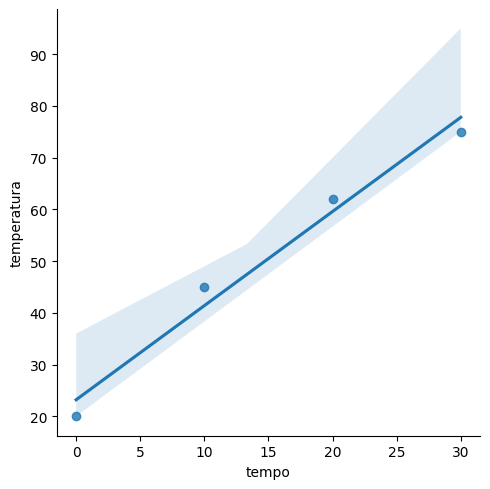

In [46]:
sns.color_palette("bright")

sns.lmplot(data=dataframe,x=column_x, y=column_y)

## Criação e Resolução do sistema

In [47]:
# matriz do sistema
matrix_a = []
# matriz do Y, resultados
matrix_b = list_y

# montando a matriz com arrays
for i in range(len(dataframe)):
    # linha do vetor
    row = []
    for j in range(len(dataframe)):
        row.append(list_x[i] ** j)
    row = np.array(row)
    matrix_a.append(row)
# criando uma matriz com os arrays
matrix_a = np.mat(matrix_a)
print(matrix_a)
print(matrix_b)
# Solução do sistema
system_solution = np.linalg.inv(matrix_a).dot(matrix_b)

print(f"\nMatriz de Solução do sistema:\n{system_solution.tolist()}")


[[    1     0     0     0]
 [    1    10   100  1000]
 [    1    20   400  8000]
 [    1    30   900 27000]]
[20, 45, 62, 75]

Matriz de Solução do sistema:
[[20.0, 3.033333333333333, -0.06000000000000005, 0.0006666666666666626]]


In [50]:
choosed_number = 22

solution_list = system_solution.tolist()[0]
predicted_y_list = []

list_x_copy = range(max(list_x)* 1 + 1)
# list_x_copy = range(len(list_x))

for x in list_x_copy:
    y = 0
    for a in range(len(solution_list)):
        y += solution_list[a] * (x ** a)
    if x == choosed_number:
        print(f"O valor de Y para {x} é = {y}")
    predicted_y_list.append(y)

# print(predicted_y_list)
# print(list(list_y))

O valor de Y para 22 é = 64.79199999999993


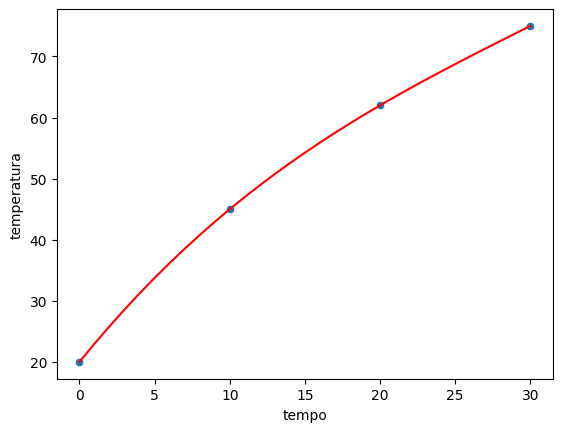

In [49]:
grafico = sns.scatterplot(dataframe, x=dataframe.columns[0], y=dataframe.columns[1])
grafico = sns.lineplot(x=list_x_copy, y=predicted_y_list, color="red")